In [1]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import cufflinks as cf
cf.go_offline()
cf.set_config_file(theme='white')

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
print('Missing Values : ')
df.isna().sum()

Missing Values : 


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df['gender'] = df['gender'].astype('category')
df['race/ethnicity'] = df['race/ethnicity'].astype('category')
df['parental level of education'] = df['parental level of education'].astype('category')
df['lunch'] = df['lunch'].astype('category')
df['test preparation course'] = df['test preparation course'].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null category
race/ethnicity                 1000 non-null category
parental level of education    1000 non-null category
lunch                          1000 non-null category
test preparation course        1000 non-null category
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: category(5), int64(3)
memory usage: 29.1 KB


In [8]:
cols_category = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for i in range(len(cols_category)):
    print(cols_category[i]+ ': ' + str(df[cols_category[i]].unique()) + '\n')

gender: [female, male]
Categories (2, object): [female, male]

race/ethnicity: [group B, group C, group A, group D, group E]
Categories (5, object): [group B, group C, group A, group D, group E]

parental level of education: [bachelor's degree, some college, master's degree, associate's degree, high school, some high school]
Categories (6, object): [bachelor's degree, some college, master's degree, associate's degree, high school, some high school]

lunch: [standard, free/reduced]
Categories (2, object): [standard, free/reduced]

test preparation course: [none, completed]
Categories (2, object): [none, completed]



In [9]:
df['average score'] = (df['math score']+df['reading score']+df['writing score'])/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [10]:
gradeA = df['average score']>90
gradeB = (df['average score']>=80) & (df['average score']<90)
gradeC = (df['average score']>=70) & (df['average score']<80)
gradeD = (df['average score']>=60) & (df['average score']<70)

df['grade'] = np.where(gradeA, 'A',
                      np.where(gradeB, 'B',
                              np.where(gradeC, 'C',
                                      np.where(gradeD,'D','F'))))

df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,F
4,male,group C,some college,standard,none,76,78,75,76.333333,C
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,C
6,female,group B,some college,standard,completed,88,95,92,91.666667,A
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,F
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000,D
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,F


In [11]:
fig = cf.subplots([df['gender'].value_counts().figure(kind='bar', color='#192a56'),
                   df['race/ethnicity'].value_counts().figure(kind='bar', color='#192a56'),
                   df['parental level of education'].value_counts().figure(kind='bar', color='#192a56'),
                   df['lunch'].value_counts().figure(kind='bar', color='#192a56'),
                   df['test preparation course'].value_counts().figure(kind='bar', color='#192a56'),],
                   shape=(2,3),
                   subplot_titles=['Gender','Race/Ethnicity','Parental Level of Education','Lunch','Test Preparation Course'])
cf.iplot(fig,legend=False)

In [12]:
df['parental level of education'].unique()

[bachelor's degree, some college, master's degree, associate's degree, high school, some high school]
Categories (6, object): [bachelor's degree, some college, master's degree, associate's degree, high school, some high school]

In [13]:
parental_sorted = ["master's degree","bachelor's degree","associate's degree","some college","high school","some high school"]

### Box Plot Dataframing

In [14]:
def box_frame(df, x_col, y_col):
    this_list,targets, contents = list(),list(), list()
    for cat in pd.unique(df[x_col]):
        targets.append(df[df[x_col]==cat])
    for i in range (len(targets)):
        contents.append(targets[i][y_col])
    this_list = list(zip(*contents))
    this_df = pd.DataFrame(this_list, columns=df[x_col].unique())
    return this_df

In [15]:
df_msp = box_frame(df, 'parental level of education', 'math score')
df_msp = df_msp[parental_sorted]
df_rsp = box_frame(df,'parental level of education', 'reading score')
df_rsp = df_rsp[parental_sorted]
df_wsp = box_frame(df,'parental level of education', 'writing score')
df_wsp = df_wsp[parental_sorted]

In [16]:
figs_sp = cf.subplots([df_msp.figure(kind='box', color='#192a56'),
                       df_rsp.figure(kind='box', color='#192a56'),
                       df_wsp.figure(kind='box', color='#192a56')],shared_xaxes=True,subplot_titles=['Math Score','Reading Score','Writing Score'],shape=(1,3))
cf.iplot(figs_sp, legend=False)

In [17]:
df_ml = box_frame(df, 'lunch', 'math score')
df_rl = box_frame(df, 'lunch', 'reading score')
df_wl = box_frame(df, 'lunch', 'writing score')

In [18]:
figs_sp = cf.subplots([df_ml.figure(kind='box', color='#192a56'),
                       df_rl.figure(kind='box', color='#192a56'),
                       df_wl.figure(kind='box', color='#192a56')],shared_xaxes=True,subplot_titles=['Math Score','Reading Score','Writing Score'],shape=(1,3))
cf.iplot(figs_sp, legend=False)

In [19]:
df_mc = box_frame(df, 'test preparation course', 'math score')
df_rc = box_frame(df, 'test preparation course', 'reading score')
df_wc = box_frame(df, 'test preparation course', 'writing score')

In [20]:
figs_sp = cf.subplots([df_mc.figure(kind='box', color='#192a56'),
                       df_rc.figure(kind='box', color='#192a56'),
                       df_wc.figure(kind='box', color='#192a56')],shared_xaxes=True,subplot_titles=['Math Score','Reading Score','Writing Score'],shape=(1,3))
cf.iplot(figs_sp, legend=False)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
gender                         1000 non-null category
race/ethnicity                 1000 non-null category
parental level of education    1000 non-null category
lunch                          1000 non-null category
test preparation course        1000 non-null category
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
average score                  1000 non-null float64
grade                          1000 non-null object
dtypes: category(5), float64(1), int64(3), object(1)
memory usage: 44.8+ KB


In [22]:
features = ['gender','race/ethnicity','parental level of education','lunch','test preparation course']
x = df[features]
x_encoded = pd.get_dummies(x)
y = df['grade'].ravel()

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_encoded,y, test_size=0.3)

In [24]:
import scikitplot as skplt
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression

In [25]:
clf = LogisticRegression(C=0.19304489066175012,
                         solver='sag',
                         tol=0.001,
                         random_state=666,
                         multi_class='multinomial')

In [26]:
clf_trained = clf.fit(x_train,y_train)
probas = clf_trained.predict_proba(x_test)

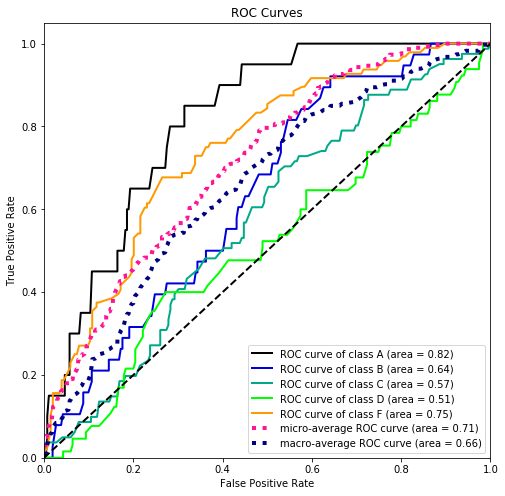

In [27]:
skplt.metrics.plot_roc(y_test, probas,figsize=(8,8))

In [28]:
feature_importance = pd.DataFrame({'Features':x_encoded.columns.tolist(),'Importance':clf.coef_[0]})
feature_importance = feature_importance.sort_values(by=['Importance'],ascending=False)
feature_importance

,Features,Importance
15,test preparation course_completed,0.499570
14,lunch_standard,0.423905
6,race/ethnicity_group E,0.410549
8,parental level of education_bachelor's degree,0.395929
0,gender_female,0.288991
7,parental level of education_associate's degree,0.215743
10,parental level of education_master's degree,0.200699
4,race/ethnicity_group C,-0.023314
2,race/ethnicity_group A,-0.064588
11,parental level of education_some college,-0.066055
